In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('medical_train.csv')
test_df = pd.read_csv('medical_test.csv')
train_df = pd.read_csv('medical_train.csv')
df = pd.read_csv('medical_costs.csv')

In [13]:
merged_df = pd.concat([train_df,test_df,train_df],axis = 0)

In [14]:
merged_df = merged_df.drop(['index', 'level_0'], axis=1)

In [15]:
merged_df.head()

,Age,BMI,Children,Medical Cost,Sex~male,Smoker~yes,Region~northwest,Region~southeast,Region~southwest
0,0.042553,0.772,0.0,0.768239,True,True,False,False,False
1,0.617021,0.164,0.4,0.865271,False,True,False,True,False
2,0.574468,0.360,0.2,0.138651,False,False,False,False,False
3,0.148936,0.628,1.0,0.116429,True,False,False,False,False
4,0.617021,0.952,1.0,0.204466,True,False,True,False,False


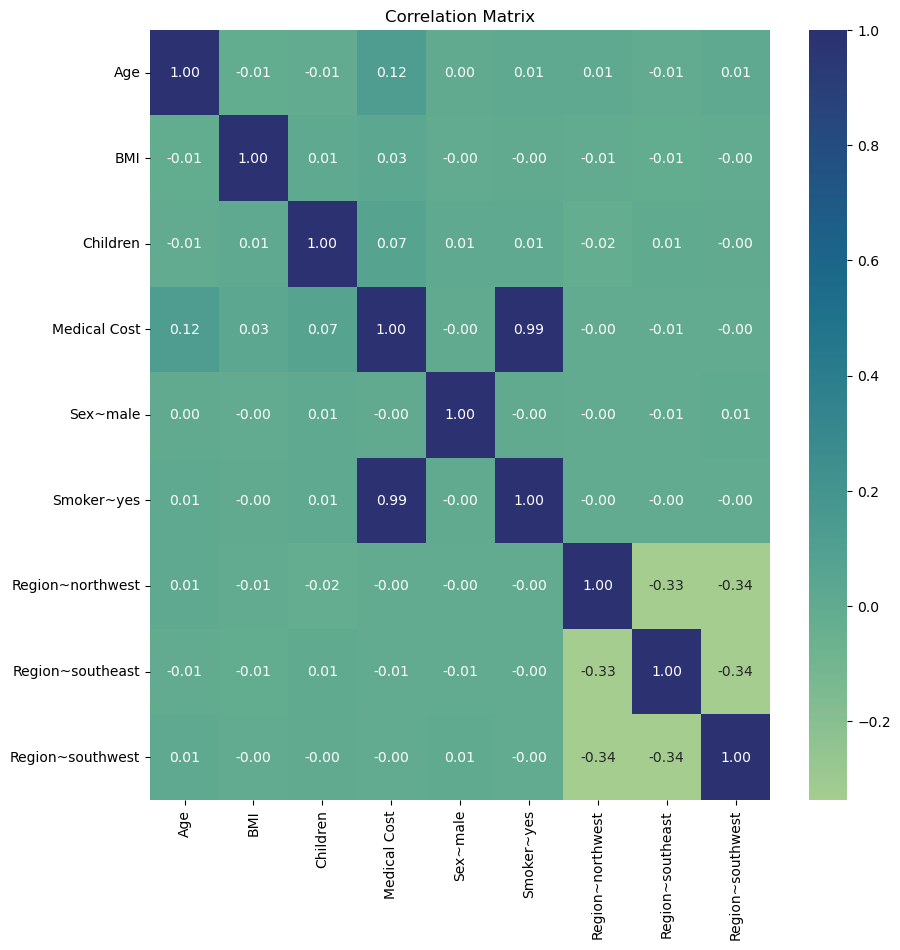

In [16]:
correlation_matrix = merged_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix,annot=True, cmap='crest', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [17]:
test_df.shape

(2000, 11)

In [18]:
import pandas as pd

target_column = 'Smoker~yes'   

target_correlations = correlation_matrix['Medical Cost']
sorted_correlations = target_correlations.sort_values(ascending=False)
sorted_correlations

Medical Cost        1.000000
Smoker~yes          0.990143
Age                 0.124606
Children            0.066957
BMI                 0.032482
Sex~male           -0.001592
Region~northwest   -0.002632
Region~southwest   -0.003646
Region~southeast   -0.005224
Name: Medical Cost, dtype: float64

In [23]:
test_df = test_df.drop(['level_0','index'], axis = 1)

In [24]:
test_df

,Age,BMI,Children,Medical Cost,Sex~male,Smoker~yes,Region~northwest,Region~southeast,Region~southwest
0,0.255319,0.900,0.2,0.824914,True,True,False,False,True
1,0.000000,0.820,0.2,0.760608,False,True,False,True,False
2,0.468085,0.848,1.0,0.869827,False,True,False,False,True
3,0.170213,0.688,0.4,0.818766,True,True,False,False,False
4,0.914894,0.532,0.4,0.911445,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...
1995,0.936170,0.272,0.2,0.163964,True,False,False,True,False
1996,0.319149,0.808,0.4,0.105311,True,False,False,False,True
1997,0.744681,0.540,0.0,0.159146,False,False,False,True,False
1998,0.808511,0.456,0.4,0.169317,True,False,False,False,True


In [ ]:
X = merged_df.drop(['Medical Cost'])
Y = merged_df['Medical Cost']

In [ ]:
pip install statsmodels pandas

In [27]:
pip install statsmodels pandas

Note: you may need to restart the kernel to use updated packages.


In [29]:
merged_df

Age                 float64
BMI                 float64
Children            float64
Medical Cost        float64
Sex~male               bool
Smoker~yes             bool
Region~northwest       bool
Region~southeast       bool
Region~southwest       bool
dtype: object

In [31]:
merged_df['Sex~male'] = merged_df['Sex~male'].astype(int)
merged_df['Smoker~yes'] = merged_df['Smoker~yes'].astype(int)
merged_df['Region~northwest'] = merged_df['Region~northwest'].astype(int)
merged_df['Region~southeast'] = merged_df['Region~southeast'].astype(int)
merged_df['Region~southwest'] = merged_df['Region~southwest'].astype(int)

In [33]:
merged_df.columns

Index(['Age', 'BMI', 'Children', 'Medical Cost', 'Sex~male', 'Smoker~yes',
       'Region~northwest', 'Region~southeast', 'Region~southwest'],
      dtype='object')

In [44]:
merged_df = merged_df.rename(columns={
    'Medical Cost': 'Medical_Cost',
    'Sex~male': 'Sex_male',
    'Smoker~yes': 'Smoker_yes',
    'Region~northwest': 'Region_northwest',
    'Region~southeast': 'Region_southeast',
    'Region~southwest': 'Region_southwest'
})

In [ ]:
smoker_yes_df = merged_df[merged_df['Smoker_yes'] == 1]
smoker_no_df = merged_df[merged_df['Smoker_yes'] == 0]

In [72]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define dependent and independent variables
Y = smoker_yes_df['Medical_Cost']
X =  smoker_yes_df[['Age', 'BMI', 'Children', 'Sex_male', 'Smoker_yes',
       'Region_northwest', 'Region_southeast', 'Region_southwest']]

# Add a constant to the model
X = sm.add_constant(X)

# Fit the model
model = smf.ols(formula = 'Medical_Cost ~ Age + BMI + Children + Sex_male + Smoker_yes + Region_northwest + Region_southeast + Region_southwest', data= smoker_yes_df).fit()

# Print summary
print(model.summary())

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:           Medical_Cost   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     7533.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:54:12   Log-Likelihood:                 18372.
No. Observations:                6993   AIC:                        -3.673e+04
Df Residuals:                    6985   BIC:                        -3.667e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          1.48e+10   4.62e+10  

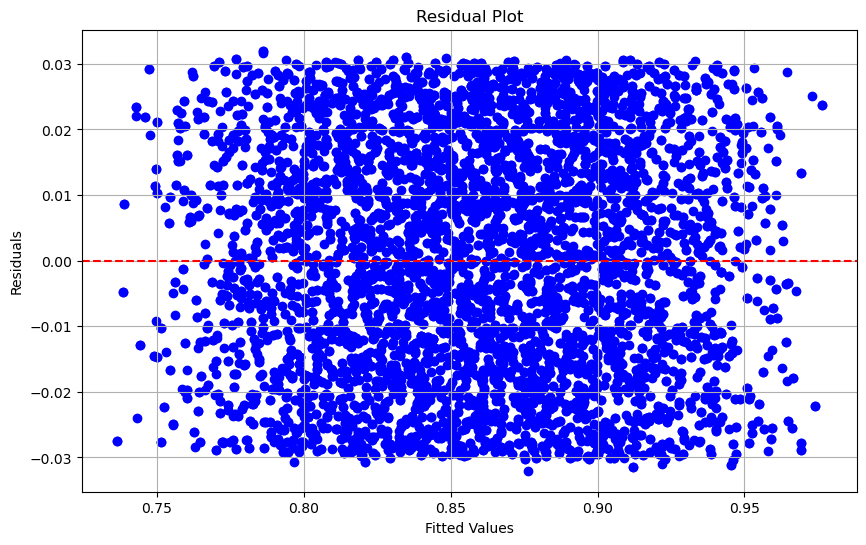

In [73]:
residuals = model.resid
plt.figure(figsize=(10, 6)) 
plt.scatter(model.fittedvalues, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot') 
plt.xlabel('Fitted Values')
plt.ylabel('Residuals') 
plt.grid()
plt.show()

In [74]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define dependent and independent variables
Y = smoker_no_df ['Medical_Cost']
X =  smoker_no_df [['Age', 'BMI', 'Children', 'Sex_male', 'Smoker_yes',
       'Region_northwest', 'Region_southeast', 'Region_southwest']]

# Add a constant to the model
X = sm.add_constant(X)

# Fit the model
model2 = smf.ols(formula = 'Medical_Cost ~ Age + BMI + Children + Sex_male + Smoker_yes + Region_northwest + Region_southeast + Region_southwest', data= smoker_no_df ).fit()

# Print summary
print(model2.summary())

# ANOVA table
anova_table = sm.stats.anova_lm(model2, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:           Medical_Cost   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     7608.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:54:15   Log-Likelihood:                 18456.
No. Observations:                7007   AIC:                        -3.690e+04
Df Residuals:                    6999   BIC:                        -3.684e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0142      0.001  

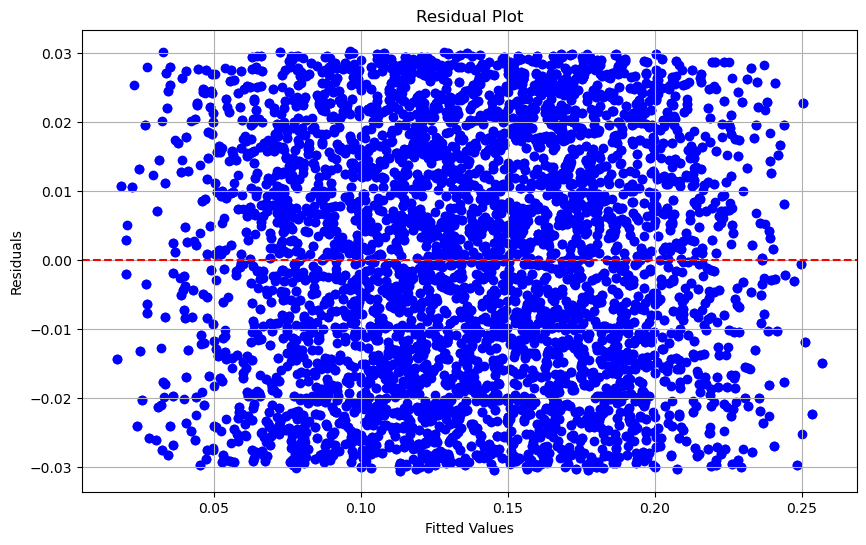

In [75]:
residuals2 = model2.resid
plt.figure(figsize=(10, 6)) 
plt.scatter(model2.fittedvalues, residuals2, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot') 
plt.xlabel('Fitted Values')
plt.ylabel('Residuals') 
plt.grid()
plt.show()

In [ ]:
# Create a QQ plot for the residualssm.qqplot(residuals, line='45') plt.title('QQ Plot of Residuals') plt.xlabel('Theoretical Quantiles') plt.ylabel('Sample Quantiles') plt.grid() plt.show(

In [76]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define dependent and independent variables
Y = merged_df ['Medical_Cost']
X =  merged_df [['Age', 'BMI', 'Children', 'Sex_male', 'Smoker_yes',
       'Region_northwest', 'Region_southeast', 'Region_southwest']]

# Add a constant to the model
X = sm.add_constant(X)

# Fit the model
model3 = smf.ols(formula = 'Medical_Cost ~ Age + BMI + Children + Sex_male + Smoker_yes + Region_northwest + Region_southeast + Region_southwest', data= merged_df ).fit()

# Print summary
print(model3.summary())

# ANOVA table
anova_table = sm.stats.anova_lm(model3, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:           Medical_Cost   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 7.626e+05
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:54:22   Log-Likelihood:                 36824.
No. Observations:               14000   AIC:                        -7.363e+04
Df Residuals:                   13991   BIC:                        -7.356e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0146      0.001  

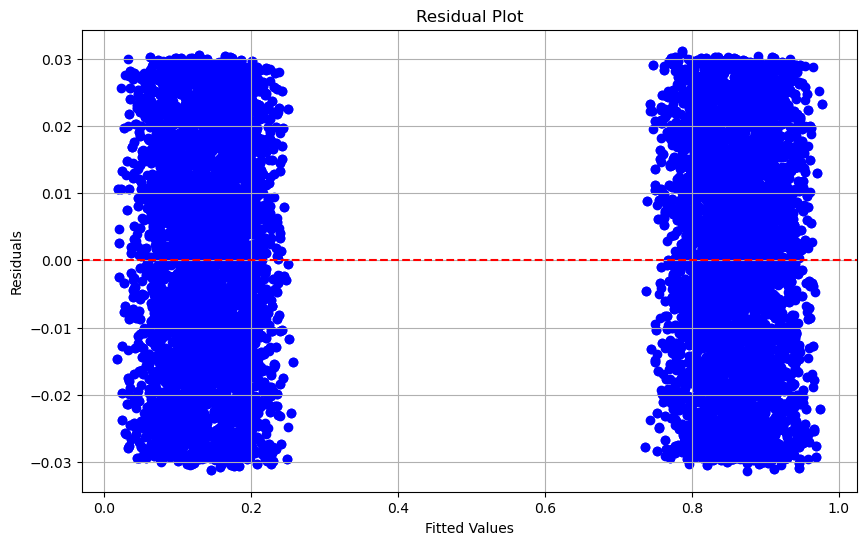

In [77]:
residuals3 = model3.resid
plt.figure(figsize=(10, 6)) 
plt.scatter(model3.fittedvalues, residuals3, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot') 
plt.xlabel('Fitted Values')
plt.ylabel('Residuals') 
plt.grid()
plt.show()

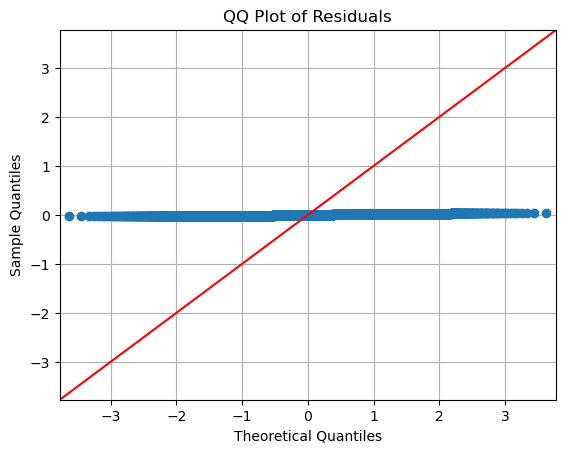

In [66]:
sm.qqplot(residuals2, line='45')
plt.title('QQ Plot of Residuals') 
plt.xlabel('Theoretical Quantiles') 
plt.ylabel('Sample Quantiles') 
plt.grid() 
plt.show()

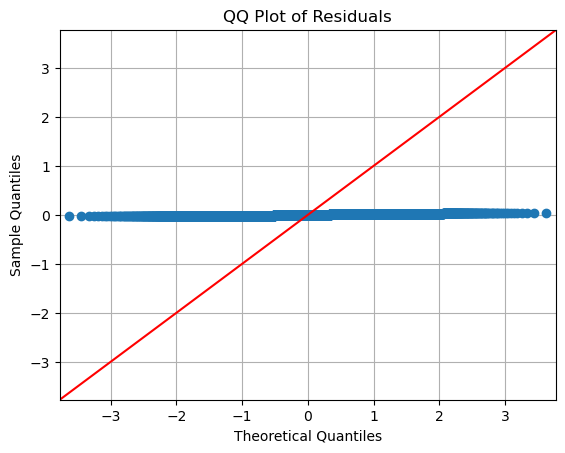

In [68]:
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals') 
plt.xlabel('Theoretical Quantiles') 
plt.ylabel('Sample Quantiles') 
plt.grid() 
plt.show()

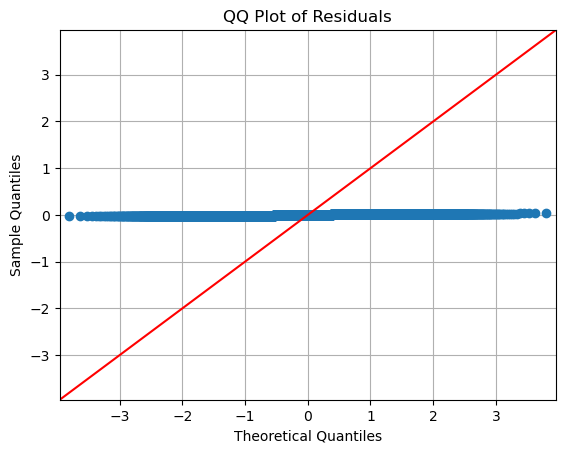

In [78]:
sm.qqplot(residuals3, line='45')
plt.title('QQ Plot of Residuals') 
plt.xlabel('Theoretical Quantiles') 
plt.ylabel('Sample Quantiles') 
plt.grid() 
plt.show()

<Axes: >

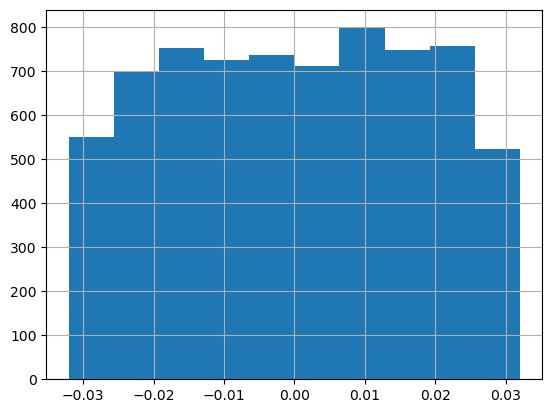

In [79]:
residuals.hist()

<Axes: >

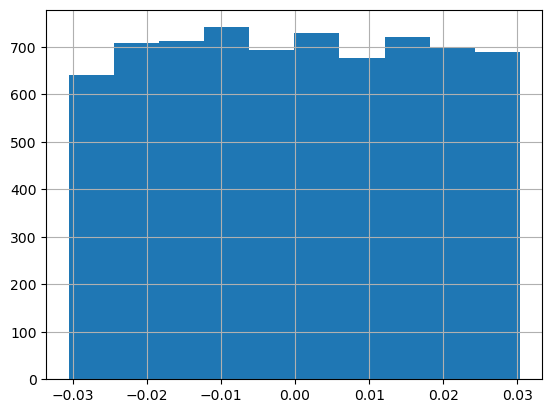

In [80]:
residuals2.hist()

<Axes: >

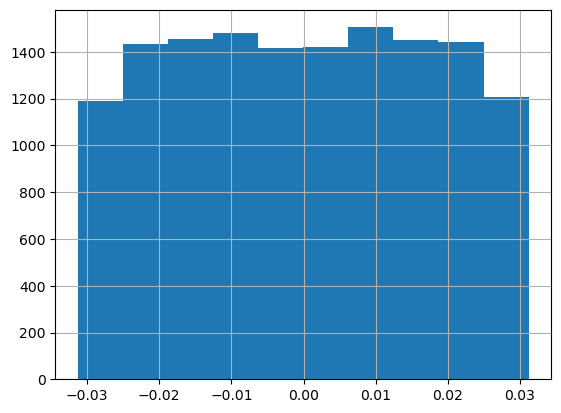

In [81]:
residuals3.hist()

Explained variance ratio: [0.22254093 0.14865748]


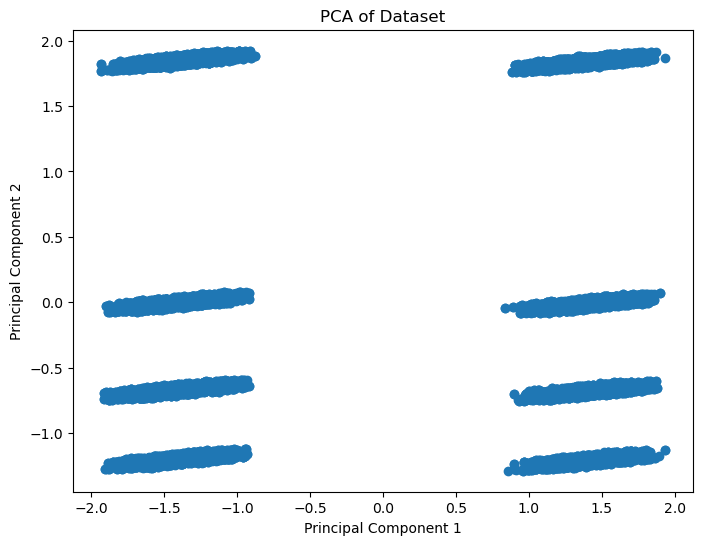

In [83]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = merged_df.columns

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(merged_df[features])

# Step 2: Apply PCA
pca = PCA(n_components=2)  # You can change n_components based on how many principal components you want
pca_result = pca.fit_transform(df_scaled)

# Step 3: Create a DataFrame for the PCA result
pca_df = pd.DataFrame(data = pca_result, columns=['PC1', 'PC2'])

# Step 4: Explained variance ratio (how much variance is captured by each component)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 5 (Optional): Plot the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()

In [84]:
merged_df.describe()

,Age,BMI,Children,Medical_Cost,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,0.505152,0.497729,0.501457,0.497886,0.492429,0.499500,0.248143,0.249714,0.254000
std,0.293705,0.289116,0.339151,0.364536,0.499961,0.500018,0.431951,0.432863,0.435313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255319,0.248000,0.200000,0.138484,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.510638,0.500000,0.600000,0.262323,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.765957,0.748000,0.800000,0.860052,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
